Friday's Total Utility: 12.251622313888452
Initial Mass of the Crusonia Plant: 99.99999999999999
  Period        Consumption
Period 1  26.85826977175836
Period 2  26.85826977175836
Period 3  26.85826977175836
Period 4 26.858269771758355


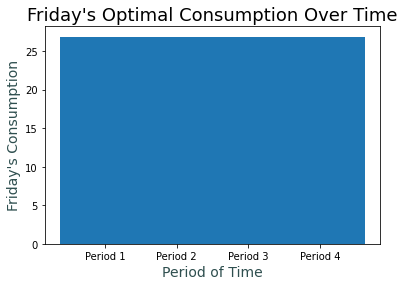

In [94]:
#Four-Period Crusonia Model
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

#Objective Function
def u(c1, c2, c3, c4):
    return math.log(c1) + ß*math.log(c2) + (ß**2)*math.log(c3) + (ß**3)*math.log(c4)
#Constraint
def c(c1, c2, c3, c4):
    return c1 + c2/π + c3/(π**2) + c4/(π**3)

#Parameters:
ß = 0.9523809523809523
π = 1.05
c0 = 100

#System of Equations for the Optimal Bundle:
A = np.array([[(1+ß+ß**2+ß**3),0, 0, 0], [0,(1+ß+ß**2+ß**3)/(ß*π), 0, 0], [0, 0 , (1+ß+ß**2+ß**3)/((ß**2)*(π**2)), 0], [0, 0 , 0, (1+ß+ß**2+ß**3)/((ß**3)*(π**3))]])
B = np.array([c0,c0, c0, c0])
C = np.linalg.solve(A, B)



#Optimal Choice in Periods 1 and 2:
c1 = C[0]
c2 = C[1]
c3 = C[2]
c4 = C[3]

#Total Utility 
print("Friday's Total Utility:", u(c1, c2, c3, c4))
print('Initial Mass of the Crusonia Plant:', c(c1, c2, c3, c4))

#Graph of Friday's Consumption Across Time
x = np.array(["Period 1", "Period 2", "Period 3", "Period 4"])
y = np.array([c1, c2, c3, c4])

fourperioddf = pd.DataFrame(data=np.column_stack((x,y)),columns=['Period','Consumption'])
print(fourperioddf.to_string(index=False))

plt.bar(x,y, width=1.25)

font1 = {'family':'MS Reference Sans Serif', 'color':'darkslategray','size':14}
font2 = {'family':'MS Reference Specialty', 'color':'black','size':18}

plt.xlabel("Period of Time",  fontdict = font1)
plt.ylabel("Friday's Consumption",  fontdict = font1)
plt.title("Friday's Optimal Consumption Over Time", fontdict = font2)

plt.show()

In [95]:
sum(y)

107.43307908703343

In [96]:
def sigma_sum(start, end, expression):
    return sum(expression(i) for i in range(start, end))

income1 = c0/(sigma_sum(1, 5,lambda i: π**(1-i) ))
print("Friday's income in Period 1 is:",income1)

print("The product of Friday's discount factor and his Crusonia plant's productivity:",ß*π)

print("The product of Friday's discount factor and his Crusonia plant's productivity:",ß*π)
print("The ratio of Friday's consumption in Period 2 to his consumption in Period 1:",c2/c1)
print("The ratio of Friday's consumption in Period 3 to his consumption in Period 2:",c3/c2)
print("The ratio of Friday's consumption in Period 2 to his consumption in Period 1:",c4/c3)

if income1 > c1:
    print("Friday saves.")

if income1 < c1:
    print("Friday dissaves.")


if income1 == c1:
    print("Friday consumes his income.")

Friday's income in Period 1 is: 26.85826977175836
The product of Friday's discount factor and his Crusonia plant's productivity: 1.0
The product of Friday's discount factor and his Crusonia plant's productivity: 1.0
The ratio of Friday's consumption in Period 2 to his consumption in Period 1: 1.0
The ratio of Friday's consumption in Period 3 to his consumption in Period 2: 1.0
The ratio of Friday's consumption in Period 2 to his consumption in Period 1: 0.9999999999999999
Friday consumes his income.


In [97]:
def sigma_sum(start, end, expression):
    return sum(expression(i) for i in range(start, end))

income1 = c0/(sigma_sum(1, 5,lambda i: π**(1-i) ))
print(income1)


26.85826977175836


In [98]:
if income1 > c1:
    print("Friday saves.")

if income1 < c1:
    print("Friday dissaves.")


if income1 == c1:
    print("Friday consumes his income.")

Friday consumes his income.


In [99]:
print(income1/c1)

1.0


Friday's income in Period 1 is: 26.85826977175836
Friday's income in Period 2 is: 26.858269771758362
Friday's income in Period 3 is: 26.85826977175837
  Period        Consumption
Period 1  26.85826977175836
Period 2 26.858269771758362
Period 3  26.85826977175837


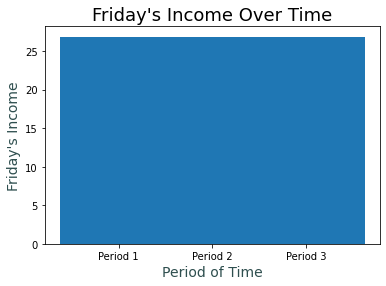

In [109]:
#WWorking Out the Time Path of Friday's Income:

#Period 1
income1 = c0/(sigma_sum(1, 5,lambda i: π**(1-i) ))
print("Friday's income in Period 1 is:",income1)

#Period 2 

capital2 = π*(c0-c1)
income2 = π*(c0-c1)/(sigma_sum(1, 4,lambda i: π**(1-i) ))

print("Friday's income in Period 2 is:",income2)

#Period 3
capital3 = π*(π*(c0-c1)-c2)

income3 = π*(π*(c0-c1)-c2)/(sigma_sum(1, 3,lambda i: π**(1-i) ))
print("Friday's income in Period 3 is:",income3)


#Data Frame for the Time Path:
timearray = np.array(["Period 1", "Period 2", "Period 3"])
incomearray = np.array([income1, income2, income3])

incomedf = pd.DataFrame(data=np.column_stack((timearray,incomearray)),columns=['Period','Consumption'])
print(incomedf.to_string(index=False))

plt.bar(timearray,incomearray, width=1.25)

font1 = {'family':'MS Reference Sans Serif', 'color':'darkslategray','size':14}
font2 = {'family':'MS Reference Specialty', 'color':'black','size':18}

plt.xlabel("Period of Time",  fontdict = font1)
plt.ylabel("Friday's Income",  fontdict = font1)
plt.title("Friday's Income Over Time", fontdict = font2)

plt.show()

In [101]:
#Some Comparisonss
print(income1/c1)
print(income2/c2)
print(income2/income1)



print(income3-income2)
print(income2-income1)

1.0
1.0000000000000002
1.0000000000000002
